In [1]:
# Al invocar la funcion fetch_housing_data() se crea el directorio datasets/housing 
# se descarga y descomprime el archivo housing.tgz localmente como housing.csv

# Inhabilito este codigo ya que lo ejecute por primera vez y ya se descargo el archivo en la maquina,
# adicionalmente al ejecutar el codigo sin contar con internet me genera error por timeout

import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
'''

# Obtener la data de internet - Tal lo indicado en el libro
"""
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# Invocar la funcion para descargar y descomprimir la data localmente
fetch_housing_data()

# Construyo Funcion para abrir el dataset ubicado en una carpeta diferente a donde esta el .py
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Invoco la funcion para abrir el dataset
housing = load_housing_data()
"""

# Abro el dataset cuando está ubicado en la misma carpeta del .py
housing = pd.read_csv("housing.csv")


In [2]:

housing.head() # Top five rows in the dataframe


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:

housing.info() # Description of the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [4]:
# Categories related to column ocean_proximity - its maybe a Categorical attribute
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
# Summary of the numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


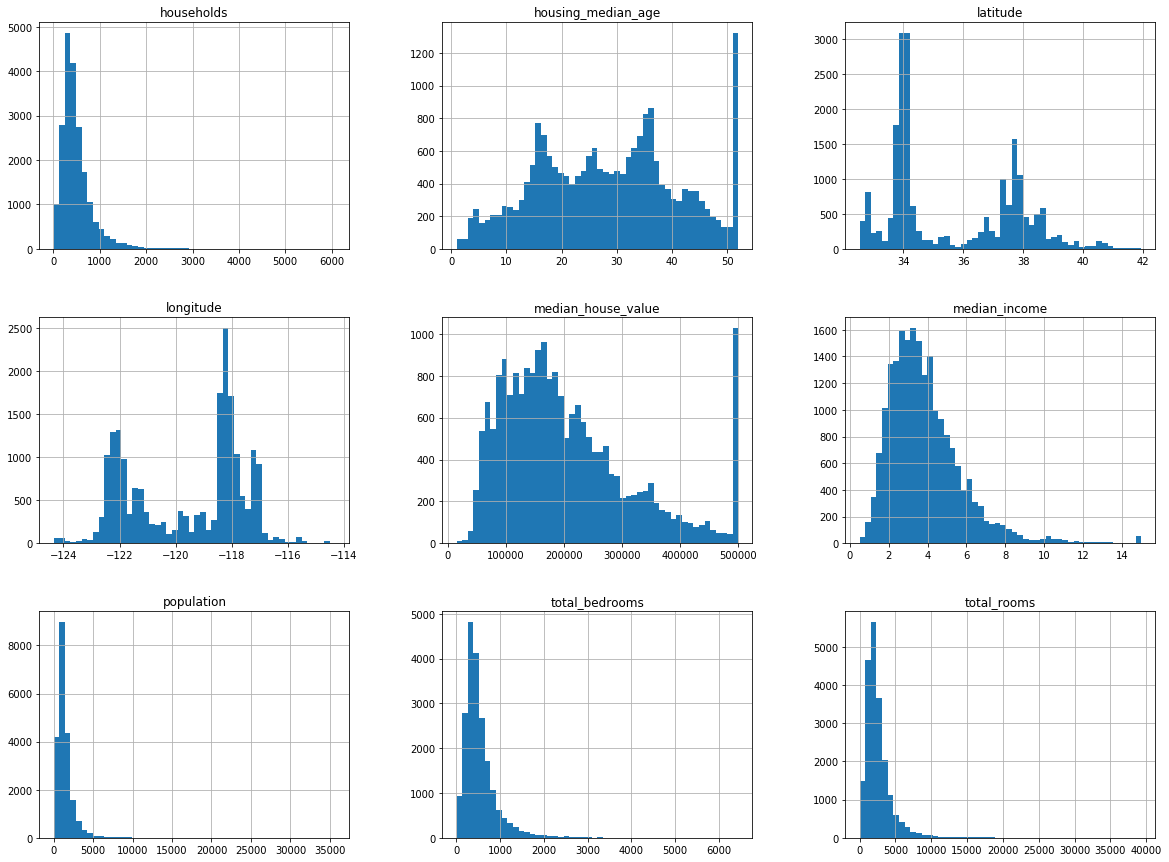

In [6]:
%matplotlib inline
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [7]:
# Creating a Test Set
# Creando el Test Set: 
# Separando 20% de la data para Test - con random y split_train_test()
# La desventaja de utilizar este random es que cada vez que ejecute el modelo
# me arroja diferentes Set Test y por lo tanto el Train Set tambien es diferente
# esto conlleva a que de alguna manera se usa toda o buena parte de la data en
# el entrenamiento del modelo, lo cual no es bueno.

#import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    print("test_set_size: ", test_set_size)        
    test_indices = shuffled_indices[:test_set_size]
    print("test indices: ", test_indices)    
    train_indices = shuffled_indices[test_set_size:]
    print("train indices: ", train_indices)    
    return data.iloc[train_indices], data.iloc[test_indices]

# iloc: seleccion con indices numericos, por posicion
# loc: seleccion con labels, etiqueta

train_set, test_set = split_train_test(housing, 0.2)

print(len(train_set), "train data +", len(test_set), "test data")

# Esta no es la forma correcta de determinar train y test sets
# ya que al actualizar el dataset se estaria mezclando data
# de train y de test, es decir, no se respetaria su clasificacion
# inicial


test_set_size:  4128
test indices:  [19823 17533 17762 ... 15288  9987 15264]
train indices:  [18680  1856  9633 ... 11121  3922  9777]
16512 train data + 4128 test data


In [8]:
# Crear un Test Set utilizando Hash en un identificador unico de cada instancia del dataset
# Para el caso del dataset housing no se tiene una columna con identificador unico para cada instancia 
# Por lo que puede usarse el row index como el identificador - ID
# Otra opcion seria utilizar el feature mas estable como identificador unico (ej. las coordenadas)
# esto en caso de no poder garantizar que no se eliminen registros del dataset original o de 
# poder incluir nueva data al dataset al final de este 

'''
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index() # Adiciona una columna 'index'
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

# Utilizando la nueva columna index, no puedo eliminar registros del dataset original, y
# las nuevas adiciones al dataset deben realizarse al final del dataset original.  
'''


'\nimport hashlib\n\ndef test_set_check(identifier, test_ratio, hash):\n    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio\n\ndef split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):\n    ids = data[id_column]\n    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))\n    return data.loc[~in_test_set], data.loc[in_test_set]\n\nhousing_with_id = housing.reset_index() # Adiciona una columna \'index\'\ntrain_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")\n\n# Utilizando la nueva columna index, no puedo eliminar registros del dataset original, y\n# las nuevas adiciones al dataset deben realizarse al final del dataset original.  \n'

In [9]:
# Seleccion Random
# Como la data siempre va a ser la misma (no cambia ni se incrementa o disminuye) usamos la funcion
# train_test_split para usar seed o random state garantizando que siempre genere los mismos indices

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

print(len(train_set), "Train Set data +", len(test_set), "Test Set data")




16512 Train Set data + 4128 Test Set data


In [10]:
# Dado que el atributo "median income" es importante para predecir el "median housing prices"
# y para evitar sesgos en la informacion, para garantizar que el "test set" sea representativo
# de las varias categorias de ingresos en el dataset, creamos un atributo categorico para el 
# median_income, dado que este es un valor continuo.
# divido el "median_income" por 1.5 y redondeadas para limitar el numero de categorias del median income
# de manera discreta. Las categorias cuyo valor sea mayor a 5, las clasifico en la categoria 5


housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace = True)



"""
Where Parameters
----------
cond : boolean NDFrame, array-like, or callable
    Where `cond` is True, keep the original value. Where
    False, replace with corresponding value from `other`.
    If `cond` is callable, it is computed on the NDFrame and
    should return boolean NDFrame or array. The callable must
    not change input NDFrame (though pandas doesn't check it).

    .. versionadded:: 0.18.1
        A callable can be used as cond.
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

print(len(train_set), "Train Set data +", len(test_set), "Test Set data")
other : scalar, NDFrame, or callable
    Entries where `cond` is False are replaced with
    corresponding value from `other`.\n\n
    If other is callable, it is computed on the NDFrame and
    should return scalar or NDFrame. The callable must not
    change input NDFrame (though pandas doesn't check it).

    .. versionadded:: 0.18.1
        A callable can be used as other.

inplace : boolean, default False
    Whether to perform the operation in place on the data
axis : alignment axis if needed, default None
level : alignment level if needed, default None
errors : str, {'raise', 'ignore'}, default 'raise'
    - ``raise`` : allow exceptions to be raised
    - ``ignore`` : suppress exceptions. On error return original object

    Note that currently this parameter won't affect
    the results and will always coerce to a suitable dtype.

try_cast : boolean, default False
    try to cast the result back to the input type (if possible),
raise_on_error : boolean, default True
    Whether to raise on invalid data types (e.g. trying to where on
    strings)

    .. deprecated:: 0.21.0from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

print(len(train_set), "Train Set data +", len(test_set), "Test Set data")
    
    
    
    
When inplace=True is passed, the data is renamed in place (it returns nothing), so you'd use:
df.an_operation(inplace=True)

When inplace=False is passed (this is the default value, so isn't necessary), 
performs the operation and returns a copy of the object
"""

'\nWhere Parameters\n----------\ncond : boolean NDFrame, array-like, or callable\n    Where `cond` is True, keep the original value. Where\n    False, replace with corresponding value from `other`.\n    If `cond` is callable, it is computed on the NDFrame and\n    should return boolean NDFrame or array. The callable must\n    not change input NDFrame (though pandas doesn\'t check it).\n\n    .. versionadded:: 0.18.1\n        A callable can be used as cond.\nfrom sklearn.model_selection import train_test_split\n\ntrain_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)\n\nprint(len(train_set), "Train Set data +", len(test_set), "Test Set data")\nother : scalar, NDFrame, or callable\n    Entries where `cond` is False are replaced with\n    corresponding value from `other`.\n\n\n    If other is callable, it is computed on the NDFrame and\n    should return scalar or NDFrame. The callable must not\n    change input NDFrame (though pandas doesn\'t check it).\n\n  

In [11]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [12]:
# Seleccion con Stratified Sampling de acuerdo con la nueva categoria "income_cat"

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
print ("Categorias Unicas de income_cat en el train set: ", strat_train_set.income_cat.unique())
    
print ("Tamaño strat_train_set", len(strat_train_set))

#plt.figure(figsize = (10,8))
#sns.boxplot(x = strat_train_set.median_income, y = strat_train_set.median_house_value)

print ("Tamaño strat_test_set", len(strat_test_set))
#print (strat_train_set)

#Proporcion de la categoria "income_cat" en el test_set
print("Proporcion con Sampling de la categoria income_cat en el test_set:\n\n", 
      (strat_test_set["income_cat"].value_counts() / len(strat_test_set) * 100))


Categorias Unicas de income_cat en el train set:  [2. 5. 3. 4. 1.]
Tamaño strat_train_set 16512
Tamaño strat_test_set 4128
Proporcion con Sampling de la categoria income_cat en el test_set:

 3.0    35.053295
2.0    31.879845
4.0    17.635659
5.0    11.458333
1.0     3.972868
Name: income_cat, dtype: float64


In [13]:
# Estos parametros son muy ampios y no se logra su graficacion
#plt.figure(figsize = (10,8))
#sns.boxplot(x = strat_train_set.median_income, y = strat_train_set.median_house_value)


In [14]:
# De acuerdo con Seleccion Random

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

print(len(train_set), "Train Set data +", len(test_set), "Test Set data")


#Proporcion de la categoria "income_cat" en el test_set con seleccion de datos aleatoria
print("Proporcion RANDOM de la categoria income_cat en el test_set:\n\n", (test_set["income_cat"].value_counts() / len(strat_test_set) * 100))



16512 Train Set data + 4128 Test Set data
Proporcion RANDOM de la categoria income_cat en el test_set:

 3.0    35.852713
2.0    32.437016
4.0    16.739341
5.0    10.949612
1.0     4.021318
Name: income_cat, dtype: float64


In [15]:
#Proporcion de la categoria "income_cat" en el dataset completo

print ("Proporcion la categoria income_cat en el dataset completo:\n\n", 
       (housing["income_cat"].value_counts() / len(housing)*100))


Proporcion la categoria income_cat en el dataset completo:

 3.0    35.058140
2.0    31.884690
4.0    17.630814
5.0    11.443798
1.0     3.982558
Name: income_cat, dtype: float64


In [16]:
# Top five rows in the strat_train_set - Stratified

strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0


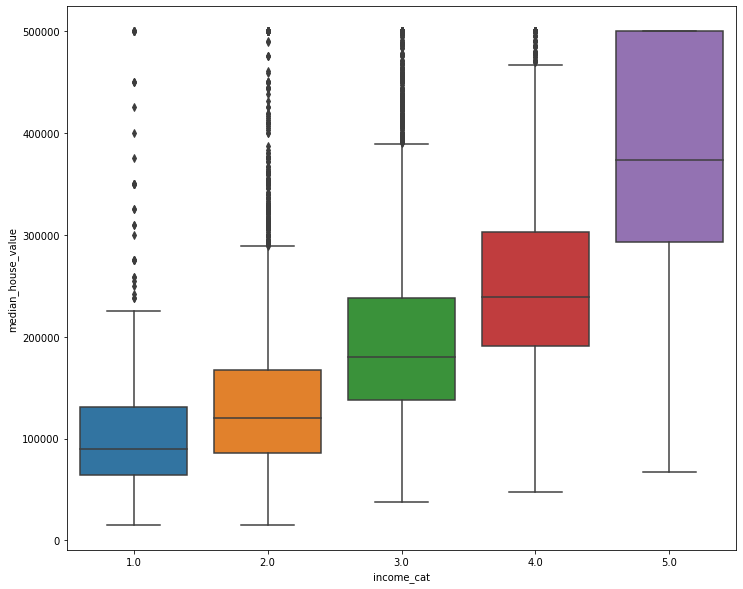

In [17]:
plt.figure(figsize = (12,10))
sns.boxplot(x = strat_train_set.income_cat, y = strat_train_set.median_house_value)

In [18]:
# help(funcion)

# seaborn.pairplot

seaborn.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

It is also possible to show a subset of variables or plot different variables on the rows and columns.

This is a high-level interface for PairGrid that is intended to make it easy to draw a few common styles. You should use PairGrid directly if you need more flexibility.

Parameters:	
data : DataFrame

Tidy (long-form) dataframe where each column is a variable and each row is an observation.

hue : string (variable name), optional

Variable in data to map plot aspects to different colors.

hue_order : list of strings

Order for the levels of the hue variable in the palette

palette : dict or seaborn color palette

Set of colors for mapping the hue variable. If a dict, keys should be values in the hue variable.

vars : list of variable names, optional

Variables within data to use, otherwise use every column with a numeric datatype.

{x, y}_vars : lists of variable names, optional

Variables within data to use separately for the rows and columns of the figure; i.e. to make a non-square plot.

kind : {‘scatter’, ‘reg’}, optional

Kind of plot for the non-identity relationships.

diag_kind : {‘auto’, ‘hist’, ‘kde’}, optional

Kind of plot for the diagonal subplots. The default depends on whether "hue" is used or not.

markers : single matplotlib marker code or list, optional

Either the marker to use for all datapoints or a list of markers with a length the same as the number of levels in the hue variable so that differently colored points will also have different scatterplot markers.

height : scalar, optional

Height (in inches) of each facet.

aspect : scalar, optional

Aspect * height gives the width (in inches) of each facet.

dropna : boolean, optional

Drop missing values from the data before plotting.

{plot, diag, grid}_kws : dicts, optional

Dictionaries of keyword arguments.

Returns:	
grid : PairGrid

Returns the underlying PairGrid instance for further tweaking.

In [19]:
#cols = ['median_house_value', 'income_cat', 'housing_median_age']
#sns.set(style = 'ticks', color_codes = 'True')
#sns.pairplot(strat_train_set[cols], size = 3, kind = 'reg')

c:\users\darangov\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


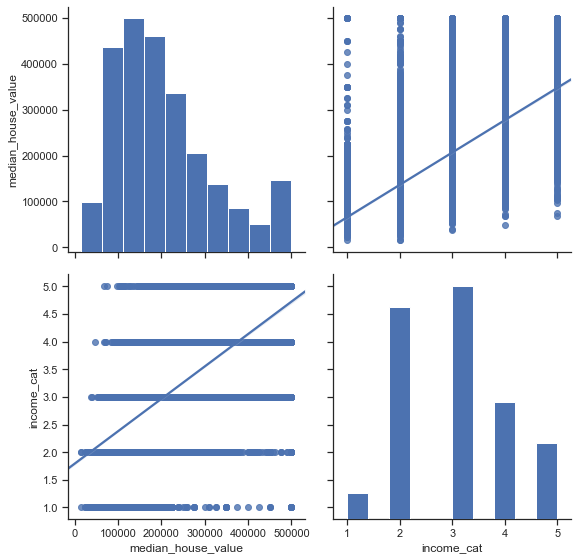

In [20]:
cols = ['median_house_value', 'income_cat']
sns.set(style = 'ticks', color_codes = 'True')
sns.pairplot(strat_train_set[cols], size = 4, kind = 'reg')

In [21]:
# Removemos el atributo income_cat de strat_train_set y de strat_test_set para dejar el dataset
# en su estado original

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True) # drop values from column income_cat
    
# axis = 1: Recorre verticalmente por columnas (izquierda a derecha) ???
# axis = 0: Recorre horizontalmente por filas (arriba hacia abajo) ???
       

In [22]:
# Top five rows in the strat_train_set - Stratified
# debe aparecer sin el campo income_cat
# strat_train_set.head()

In [23]:
# Creo copia del training set para no dañar el original.Lo llamo housing
housing = strat_train_set.copy()

In [24]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


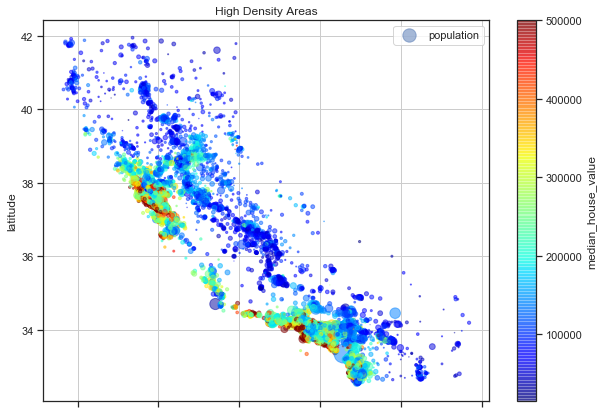

In [25]:
# Dado que tenemos informacion geografica (latitud y longitud) creamos un scatterplot
# de la copia de strat_train_set y que llamé housing

#housing.plot(kind = "scatter", x = "longitude", y = "latitude")
"""housing.plot(kind = "scatter", x = "longitude", y = "latitude", title = "High density areas", grid = True, 
             alpha = "0.1") """

housing.plot(kind = "scatter", x = "longitude", y = "latitude", title = "High Density Areas", grid = True, 
             alpha = 0.5, s = housing["population"]/100, label = "population", figsize = (10,7), 
             c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend()

# El radio de cada circulo representa la poblacion de cada distrito (opcion s)
# El color representa el precio (opcion c)
# color map predefinido (opcion cmap) llamado jet, que va de azul a rojo

In [26]:
# Determino correlaciones
# Con el coeficiente de correlacion estandar (Pearsons r) entre cada par de atributos
# respecto al atributo median_house_value

corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending = False)



median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [27]:
train_corr = strat_train_set.select_dtypes(include = [np.number])

train_corr.shape


(16512, 9)

Text(5, 12.3, 'Correlations Heat Map')

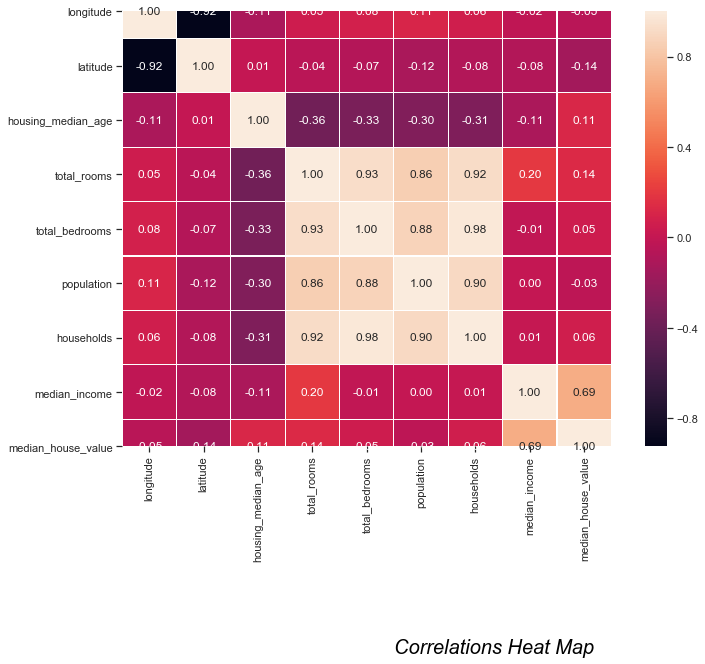

In [28]:
# Correlacion entre todos los atributos
correlation = train_corr.corr()
f , ax = plt.subplots(figsize = (12,8))
#sns.heatmap(correlation, annot = True, linewidth = 0.5, ax = ax, square = True, cbar = True, robust = True)
sns.heatmap(correlation, annot = True, linewidth = 0.1, ax = ax, square = True, fmt = ".2f", annot_kws={'size':12})
# fmt = ".2f" - float 2 decimales
plt.text(5,12.3, "Correlations Heat Map", fontsize = 20, color='Black', fontstyle='italic')
#plt.show()

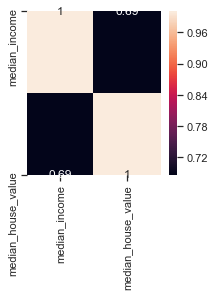

In [29]:
# Correlacion respecto al atributo principal y con correlacion superior a 0.5

top_feature = correlation.index[abs(correlation['median_house_value'] > 0.5)]
plt.subplots(figsize = (3,3))
top_corr = train_corr[top_feature].corr()
sns.heatmap(top_corr, annot = True)
plt.show()



In [30]:
# cols = ['median_house_value', 'income_cat', 'total_rooms']
#sns.set(style = 'ticks')
#sns.pairplot(strat_train_set[cols], size = 4, kind = 'reg')


# Prepare the data for ML Algorithms

In [31]:
# Creo copia del training set pero obviando 'predictors' y 'labels' (valores). 
# ya que no deseo aplicar transformaciones a estos atributos.
# Lo llamo housing
# drop() crea una copia, un nuevo objeto de la data sin afectar el strat_train_set y
# obviando el/los campos indicados.

housing = strat_train_set.drop("median_house_value", axis = 1)

# axis = 1 para remover columna; en este caso "median_housde_value"

In [32]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [33]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [34]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.7+ MB


In [35]:
# En nueva variable 'almaceno' los valores de los labels (valores) del atributo (que es dado pero que 
# finalmente es el que deseo predecir)

housing_labels = strat_train_set["median_house_value"].copy()
housing_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

# Data Cleaning

Attribute with missing values: total_bedrooms

puedo ejecutar cualquiera de estas opciones:
dropna(): drops any row containing missing values
drop(): creates new object without an indicated column(s)
set missing values to: zero, the mean, the median, etc)   

In [36]:
# Attribute with missing values: total_bedrooms

# Imputer class to manage missing values

from sklearn.preprocessing import Imputer

imputer = Imputer(strategy = "median")

# since the median can only be computed on numerical attributes, we need to create a copy
# of the data without the text attribute ocean_proximity

housing_num = housing.drop("ocean_proximity", axis = 1)

housing_num.head()

c:\users\darangov\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [37]:
# Aplico clase Imputer definida
# Esta calcula la mediana de cada atributo numerico y lo almacena en su
# variable de instancia statistics_
# se debe aplicar a toda la data ya que en un futuro, con el sistema en producccion
# la nueva data podria traer otros campos con data vacia

imputer.fit(housing_num)
mediana_train = imputer.statistics_
mediana_train
#imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [38]:
housing_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64

In [39]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [40]:
# Reemplazo valores faltantes con la mediana calculada con Imputer

X = imputer.transform(housing_num)

# Plain Numpy array containing the transformed features 
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [41]:
# create a Pandas Dataframe with transformed features
housing_tr = pd.DataFrame(X, columns = housing_num.columns)
housing_tr.info()

# ya estan todos los datos llenos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


# Handling Text and Categorical Attributes

In [42]:
# Convert categories from text to numbers

housing_cat = housing["ocean_proximity"]
housing_cat.head()

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
Name: ocean_proximity, dtype: object

In [46]:
# Metodo por si solo no recomendable ya que algoritmo asume que valores cercano son mas afines que los lejanos
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0], dtype=int32)

In [47]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [48]:
# Convert categories from text to one-hot vectors
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

c:\users\darangov\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>